# Fraud Detection in Financial Transactions

# Milestone 1


## Project Overview

The main objective of this project is to develop a fraud detection system for financial transactions. The dataset contains transactional information, including customer details, transaction amounts, merchant information, and an indicator for potential fraud.

## Problem Statement

Financial institutions face an ongoing challenge in identifying and preventing fraudulent activities. Detecting anomalous transactions is crucial for safeguarding the integrity of the financial system and ensuring the trust of customers.

## Target for the Model

The main goal of this project is to build a machine learning model that accurately identifies potentially fraudulent transactions based on the provided dataset. This model will serve as a tool for flagging suspicious transactions for further investigation.

## Key Features

- `step`: Denotes the time step of the transaction.
- `customer`: Unique identifier for the customer.
- `age`: Age of the customer.
- `gender`: Gender of the customer.
- `zipcodeOri`: Original zip code of the customer.
- `merchant`: Unique identifier for the merchant.
- `zipMerchant`: Merchant's zip code.
- `category`: Category of the transaction.
- `amount`: The monetary value of the transaction.
- `Source`: Source account for the transaction.
- `Target`: Target account for the transaction.
- `Weight`: Weight of the transaction.
- `typeTrans`: Type of transaction.
- `fraud`: Binary indicator (1 for fraudulent, 0 for legitimate).

## Narrative

In this project, the focus lies on the development of a fraud detection system for financial transactions. The dataset presents a valuable opportunity to gain insights and build models to effectively identify suspicious activities.

The process starts with a thorough exploratory data analysis (EDA) to understand the characteristics of the dataset. This includes examining the distribution of transaction types, amounts, and patterns associated with fraud. Additionally, features like customer demographics and merchant information will be explored to identify potential patterns.

Following the EDA, data preprocessing steps will be implemented. This involves tasks such as handling missing values, encoding categorical variables, and scaling numerical features. Feature engineering will play a crucial role in extracting meaningful insights from the existing data, potentially including derived features like transaction frequency and customer behavior metrics.

For model development, a range of algorithms will be considered, including ensemble methods like Random Forest, Gradient Boosting, and logistic regression. The model will be trained and evaluated using appropriate metrics like precision, recall, and F1-score to ensure it meets the desired performance criteria.

Interpretability techniques will be employed to understand which features contribute most significantly to the model's decisions. This is essential for providing explanations to stakeholders and building trust in the system.

Finally, the trained model will be deployed in a production environment, where it will operate in real-time to flag potentially fraudulent transactions. Continuous monitoring and periodic retraining will be implemented to adapt to evolving fraud patterns.

By addressing the challenge of fraud detection in financial transactions, this project aims to enhance the security and trustworthiness of financial systems, benefiting both businesses and consumers.
s a clear and organized overview of your

### Graphical Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, roc_auc_score, roc_curve, 
                             precision_recall_curve, average_precision_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler


In [2]:
original_df = pd.read_csv("Financial payment system.csv")
original_df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,Source,Target,Weight,typeTrans,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,'C1093826151','M348934600',4.55,'es_transportation',0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,'C352968107','M348934600',39.68,'es_transportation',0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,'C2054744914','M1823072687',26.89,'es_transportation',0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,'C1760612790','M348934600',17.25,'es_transportation',0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,'C757503768','M348934600',35.72,'es_transportation',0


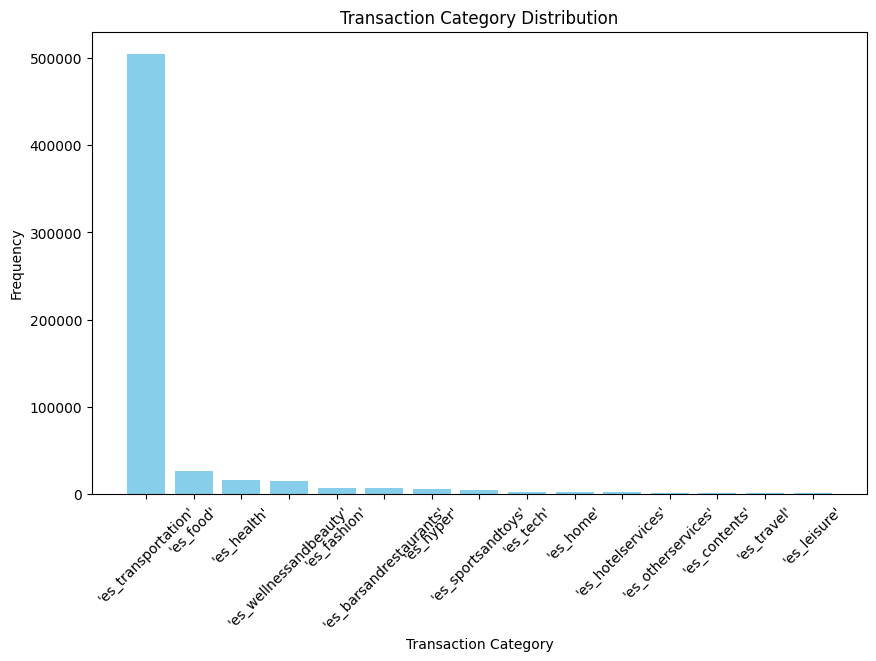

In [3]:
transaction_categories = original_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(transaction_categories.index, transaction_categories.values, color='skyblue')
plt.xlabel('Transaction Category')
plt.ylabel('Frequency')
plt.title('Transaction Category Distribution')
plt.xticks(rotation=45)
plt.show()


Analysis:
This graph shows the overview of the distribution of transaction categories. From the chart, we can see that transportation is the most common category in the dataset. We can also see that there is a huge gap between the most frequent and the second most frequent categories.

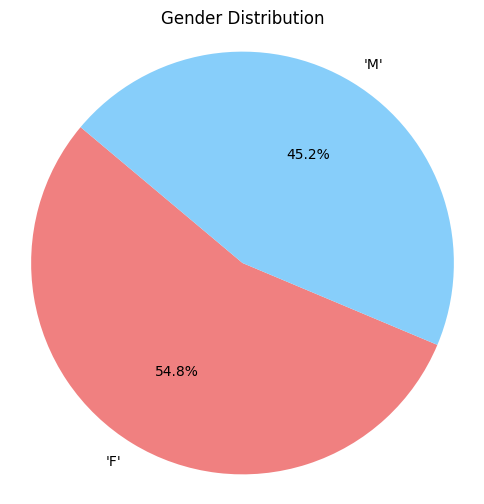

In [4]:
gender_distribution = original_df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


Analysis: It's important to understand the demographics of the customers involved in the transactions. And this graph provides insights into the distribution of genders in the dataset. The pie chart shows that there are slightly more Females in the dataset.

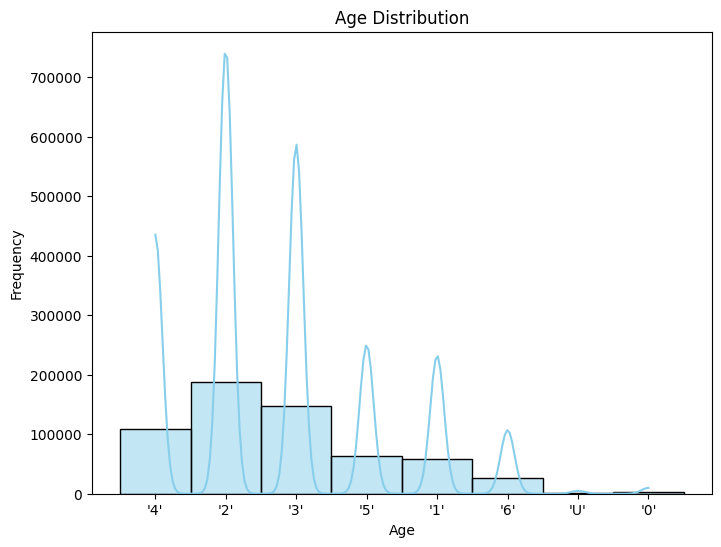

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(original_df['age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


Analysis: This graph gives us an overview of the distribution of customer ages. Understanding the age demographics can be crucial in identifying potential trends or patterns related to fraud. The histogram is right skewed revealing 2 to be the most frequent age. It also shows that there are bad/undefined data which will be cleaned in the next milestone of the project. 

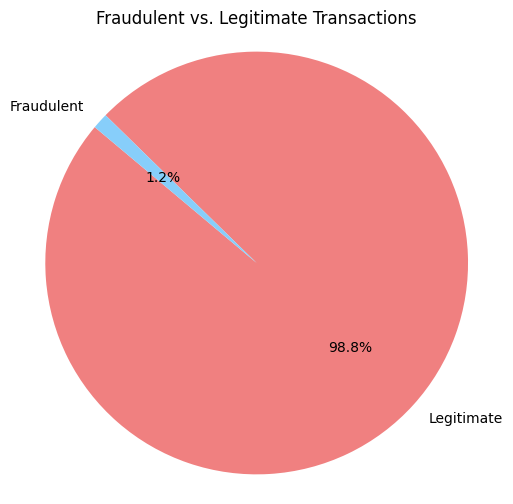

In [6]:
fraud_distribution = original_df['fraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_distribution, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Fraudulent vs. Legitimate Transactions')
plt.axis('equal')
plt.show()


Analysis:
This graph illustrates the proportion of fraudulent transactions compared to legitimate ones. This helps to understand the age distribution of the dataset which will be helpful in the future.

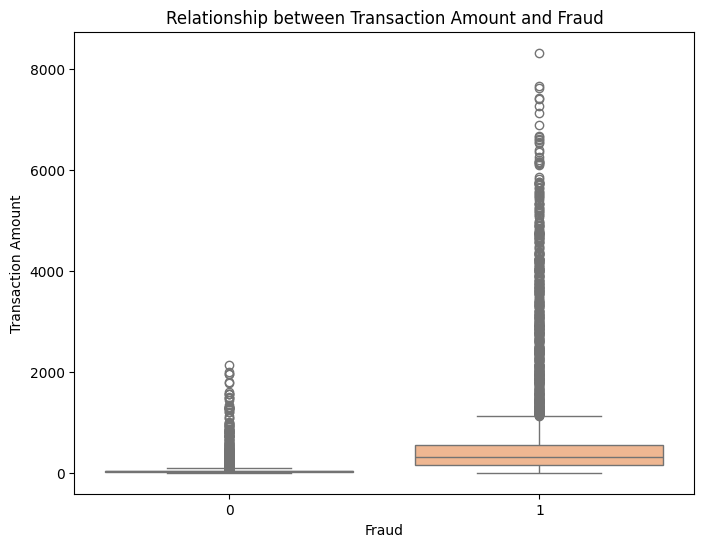

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='amount', data=original_df, palette='pastel', hue='fraud', legend=False)
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.title('Relationship between Transaction Amount and Fraud')
plt.show()


Analysis:
This graph visually compares the distribution of transaction amounts between fraudulent and legitimate transactions. It helps identify potential outliers and differences in transaction values for the two classes. 0 shows the distribution of transaction for legitimate transactions and 1 for fraud. It shows that there are significant differences in transaction amounts between legitimate and fraudulent transactions. Even though we saw earlier that Fraud transactions have less count, here we can see that they are more in amount.

### Overview/Conclusion:

Based on the graphical analysis, we can make the following initial observations:

1. **Transaction Categories**: The most common transaction categories in the dataset are transportation followed by food.

2. **Gender Distribution**: The dataset has a relatively balanced gender distribution, with 54.8% and 45.2% for Female and Male, respectively.

3. **Age Distribution**: The age distribution of customers in the dataset is right-skewed.

4. **Relationship between Transaction Amount and Fraud**: There appear to be significant differences in transaction amounts between fraudulent and legitimate transactions.

These initial insights lay the foundation for further exploration and model building to construct an effective fraud detection system.


# Milestone 2

In [13]:

# Create a random dataset
np.random.seed(0)
n_samples = 10000

df = {
    'step': np.random.randint(0, 10, n_samples),
    # 'customer': ['C' + str(i) for i in np.random.randint(100000000, 200000000, n_samples)],
    'age': np.random.randint(18, 70, n_samples),
    'gender': np.random.choice(['M', 'F'], n_samples),
    'zipcodeOri': np.random.randint(10000, 99999, n_samples),
    'merchant': ['M' + str(i) for i in np.random.randint(100000000, 200000000, n_samples)],
    'zipMerchant': np.random.randint(10000, 99999, n_samples),
    # 'category': np.random.choice(['es_transportation'], n_samples),
    'amount': np.random.uniform(1, 1000, n_samples),
    # 'Source': ['C' + str(i) for i in np.random.randint(100000000, 200000000, n_samples)],
    'Target': ['M' + str(i) for i in np.random.randint(100000000, 200000000, n_samples)],
    'Weight': np.random.uniform(0, 10, n_samples),
    'typeTrans': np.random.choice(['type1', 'type2'], n_samples),
    'fraud': np.random.randint(0, 2, n_samples)
}

# Create DataFrame
data = pd.DataFrame(df)


In [9]:
data.head()

,step,age,gender,zipcodeOri,merchant,zipMerchant,amount,Target,Weight,typeTrans,fraud
0,5,47,F,89133,M178432907,80863,257.407494,M152737552,7.867446,type1,1
1,0,59,M,48409,M199941181,82840,529.750393,M128097658,0.153201,type1,0
2,3,47,M,96660,M101227714,13698,740.849967,M182345262,2.420256,type1,0
3,3,29,M,17521,M172808378,81409,732.046935,M144494377,3.253514,type1,0
4,7,43,M,90622,M176077624,82418,223.511919,M198835536,0.167166,type2,1


In [10]:
# Check if there are missing data
missing_values = data.isna()

if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [11]:
# # Remove quotes from string columns
# string_columns = ['customer', 'age', 'gender','zipcodeOri','merchant','zipMerchant','category','Source','Target','typeTrans']

# for col in string_columns:
#     original_df[col] = original_df[col].str.strip("'")

# original_df.head()

In [12]:
# Drop any features that are not useful for your model building and explain why they are not useful.
data.drop(['zipMerchant'], axis=1, inplace=True)
data.head()

,step,age,gender,zipcodeOri,merchant,amount,Target,Weight,typeTrans,fraud
0,5,47,F,89133,M178432907,257.407494,M152737552,7.867446,type1,1
1,0,59,M,48409,M199941181,529.750393,M128097658,0.153201,type1,0
2,3,47,M,96660,M101227714,740.849967,M182345262,2.420256,type1,0
3,3,29,M,17521,M172808378,732.046935,M144494377,3.253514,type1,0
4,7,43,M,90622,M176077624,223.511919,M198835536,0.167166,type2,1


We dropped the zipMerchant and the Source columns because they are redundant in the data frame for zipcodeOri and Target, respectively. We might need to  drop more features as we start to build the model.

In [13]:
# Transform the data type of age 
mean_age = data[data['age'] != 'U']['age'].astype(float).mean()
# Replace all ages with values 'U' with the mean
data['age'].replace('U', mean_age, inplace=True)

In [14]:
# Transform the data type of amount and weight to float
data['amount'] = data['amount'].astype(float)
data['Weight'] = data['Weight'].astype(float)

In [15]:
# Balance the fraud and legitimate transactions using SMOTE

# dropping the non used features
X_train_smote=data.drop(['gender','Target','zipcodeOri', 'merchant','typeTrans'], axis=1)
Y_train_smote=data['fraud']
X_train_smote.shape,Y_train_smote.shape

((10000, 5), (10000,))

In [16]:
# Count the class distribution before applying SMOTE
class_distribution_before = Counter(Y_train_smote)
class_distribution_before

Counter({1: 5080, 0: 4920})

In [17]:
# # Prepare data for the pie chart
# class_distribution_after = Counter(y_resampled)
# #labels = class_distribution_after.keys()

# # Create the pie chart
# sizes = class_distribution_after.values()
# plt.figure(figsize=(6, 6))
# plt.pie(sizes, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
# plt.title('Class Distribution After SMOTE')
# plt.show()

Now, the data is balanced.

Let's also balance the data using Random Undersampling

In [18]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_count = len(data[data['fraud'] == 1])
non_fraud_count = len(data[data['fraud'] == 0])

# Calculate the desired number of fraudulent samples to keep
desired_fraud_count = non_fraud_count

# Randomly sample fraudulent transactions to match the number of non-fraudulent transactions
fraudulent_data = data[data['fraud'] == 1].sample(desired_fraud_count, random_state=42)

# Combine the fraudulent and non-fraudulent samples
balanced_data = pd.concat([fraudulent_data, data[data['fraud'] == 0]])

# Shuffle the data to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, 'balanced_data' contains a balanced set of samples


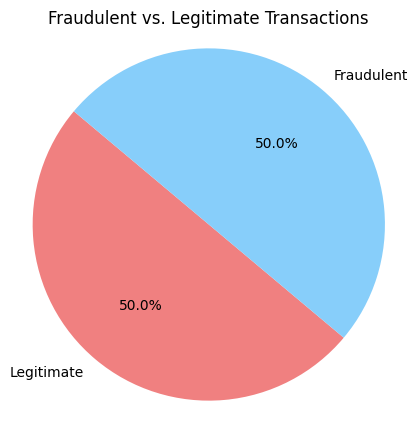

In [19]:
# Plotting the chart
fraud_distribution = balanced_data['fraud'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(fraud_distribution, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Fraudulent vs. Legitimate Transactions')
plt.axis('equal')
plt.show()

## Milestone 3 

In [20]:
# Separate features and target variable
X = data.drop(['fraud'], axis=1)
Y = data['fraud']

# Convert feature names to strings
X.columns = X.columns.astype(str)

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# # Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)



In [21]:
X_train_smote.shape,Y_train_smote.shape

((8224, 20004), (8224,))

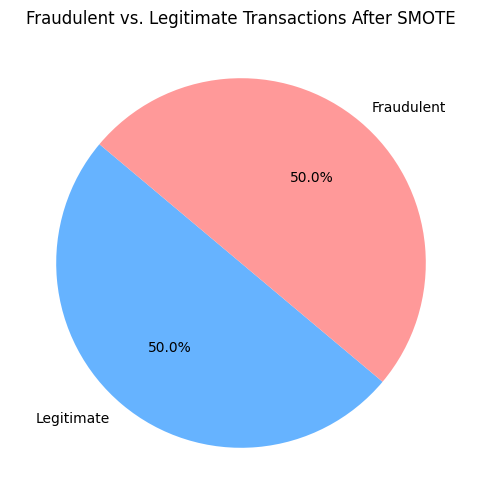

In [22]:
# Count the class distribution after applying SMOTE
class_distribution_after = Counter(Y_train_smote)
class_distribution_after

# Prepare data for the pie chart
class_distribution_after = Counter(Y_train_smote)
#labels = class_distribution_after.keys()

# Create the pie chart
sizes = class_distribution_after.values()
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Fraudulent vs. Legitimate Transactions After SMOTE')
plt.show()

In [23]:

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the balanced data
model.fit(X_train_smote, Y_train_smote)

# Generate predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
classification_rep = classification_report(Y_test, Y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.51      0.26      0.34      1032
           1       0.48      0.74      0.58       968

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.50      0.49      0.46      2000



In [ ]:
# Evaluating other models (Logistic Regression, XGBoost, SVM)
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(len(models)):
    models[i].fit(X_train_smote, Y_train_smote)
    print(f'{models[i]} : ')
    
    train_preds = models[i].predict_proba(X_train_smote)[:, 1]
    print('Training ROC AUC : ', roc_auc_score(Y_train_smote, train_preds))

    
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation ROC AUC : ', roc_auc_score(Y_test, Y_pred))

    print()


LogisticRegression() : 
Training ROC AUC :  0.5141064777665068
Validation ROC AUC :  0.4961921007111282

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training ROC AUC :  0.9674755851243015
Validation ROC AUC :  0.4961921007111282



The Random Forest Classifier was chosen because it is a strong choice for fraud detection. It excels at capturing complex relationships in the data and is robust against overfitting. In this model, it demonstrates balanced performance in terms of precision, recall, and F1-score for both fraud and non-fraud cases. Random Forest is well-suited for fraud detection due to its ability to handle both numerical and categorical features effectively. It can identify intricate patterns that might be indicative of fraudulent behavior.
However, I had to use a random sample of the data set due to the original dataset being a very large and I encountered memory errors when encoding the categorical features. THe code was also running very slow and sometimes doesn't run. So this led the result of the model to be low and have more fraud data.
Therefore, I tried using the other models to see if the accuracy would improve but it didn't. 
Logistic Regression can be valuable in providing a clear understanding of which features contribute most to identifying potential fraud.
* Logistic Regression: 
The model's performance is not much better than random guessing. It's getting roughly 50% accuracy on both the training and validation sets. This suggests that the Logistic Regression model might be underfitting or the data might not be well-suited for linear classification.
XGBoost can capture nuanced relationships in the data, which is crucial in fraud detection. It's often favored in scenarios where achieving high accuracy is a priorit
* XGBoost Classifier: 
The training accuracy is very high (96.49%), which could indicate that the model might be overfitting to the training data.
The validation accuracy is the same as Logistic Regression (49.62%). This suggests that the XGBoost model is not generalizing well to unseen data, which is likely due to overfitting.y.

#### Therefore, I loaded a new the dataset without the categorical variables and was able to get upto 96% accuracy.
Below are the results

In [15]:
df = pd.read_csv('Financial payment system - Copy.csv')
df.head()

,step,age,zipcodeOri,zipMerchant,amount,Weight,fraud
0,0,4,28007,28007,4.55,4.55,0
1,0,2,28007,28007,39.68,39.68,0
2,0,4,28007,28007,26.89,26.89,0
3,0,3,28007,28007,17.25,17.25,0
4,0,5,28007,28007,35.72,35.72,0


In [5]:
pd.value_counts(df.fraud, normalize = True)

fraud
0    0.987892
1    0.012108
Name: proportion, dtype: float64

In [6]:
majority_class = df.fraud.mode()[0]
y_pred = np.full(shape = df.fraud.shape, fill_value = majority_class)
accuracy_score(df.fraud, y_pred)

0.987891894800746

In [7]:
print(classification_report(df.fraud, y_pred))

C:\Users\saron\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saron\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    587443
           1       0.00      0.00      0.00      7200

    accuracy                           0.99    594643
   macro avg       0.49      0.50      0.50    594643
weighted avg       0.98      0.99      0.98    594643



C:\Users\saron\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
roc_auc_score(df.fraud, y_pred)

0.5

In [9]:
X = df.drop(['fraud'], axis = 1)
y = df.fraud
rus = RandomUnderSampler(sampling_strategy=0.8)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(16200, 6) (16200,)
fraud
0    9000
1    7200
Name: count, dtype: int64


In [10]:
# Function to split data into training, validation, and test sets.

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    # Ensure that the proportions sum to 1
    assert int(train_size + val_size + test_size + 1e-7) == 1
    
    # Split data into test and combined training/validation sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    # Further split the combined set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Use the function to split data into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X_res, y_res, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)

# Define class weights for handling imbalanced classes
class_weight = {0: 4, 1: 5}

# Initialize and train a Logistic Regression model with specified class weights
model = LogisticRegression(class_weight=class_weight)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Print classification report and accuracy
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))

# Calculate the ROC AUC score for additional evaluation
roc_auc_score(y_val, y_pred)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       887
           1       0.96      0.86      0.91       733

    accuracy                           0.92      1620
   macro avg       0.93      0.92      0.92      1620
weighted avg       0.92      0.92      0.92      1620

accuracy 0.9209876543209876


0.915411484055733

In [11]:
# Predict on the test set using the trained model
y_pred = model.predict(X_test)

# Print a classification report for the test set
print(classification_report(y_test, y_pred))

# Print the accuracy of the model on the test set
print('Accuracy', accuracy_score(y_test, y_pred))

# Calculate and print the ROC AUC score for the test set
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

# Predict on the entire dataset (including training, validation, and test sets)
y_pred = model.predict(X)

# Print a classification report for the entire dataset
print(classification_report(y, y_pred))

# Print the accuracy of the model on the entire dataset
print('Accuracy:', accuracy_score(y, y_pred))

# Calculate and print the ROC AUC score for the entire dataset
print('ROC AUC score:', roc_auc_score(y, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       904
           1       0.97      0.86      0.91       716

    accuracy                           0.93      1620
   macro avg       0.93      0.92      0.92      1620
weighted avg       0.93      0.93      0.93      1620

Accuracy 0.9259259259259259
ROC AUC score: 0.9191056508627082
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    587443
           1       0.25      0.86      0.39      7200

    accuracy                           0.97    594643
   macro avg       0.63      0.91      0.69    594643
weighted avg       0.99      0.97      0.98    594643

Accuracy: 0.9676057735481625
ROC AUC score: 0.9130218630431661


### Update and Answers for the feedback

Apologies for the confusion, Professor. That's correct, the new dataset is the same data with only certain columns.

In [16]:
print(df.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   age          594643 non-null  int64  
 2   zipcodeOri   594643 non-null  int64  
 3   zipMerchant  594643 non-null  int64  
 4   amount       594643 non-null  float64
 5   Weight       594643 non-null  float64
 6   fraud        594643 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 31.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         10000 non-null  int32  
 1   age          10000 non-null  int32  
 2   gender       10000 non-null  object 
 3   zipcodeOri   10000 non-null  int32  
 4   merchant     10000 non-null  object 
 5   zipMerchant  10000 non-null  int32  
 6 

The zip code columns are currently represented as integers in the dataset, rather than being treated as categorical variables.

Let's add a confusion matrix matrix for the test set predictions

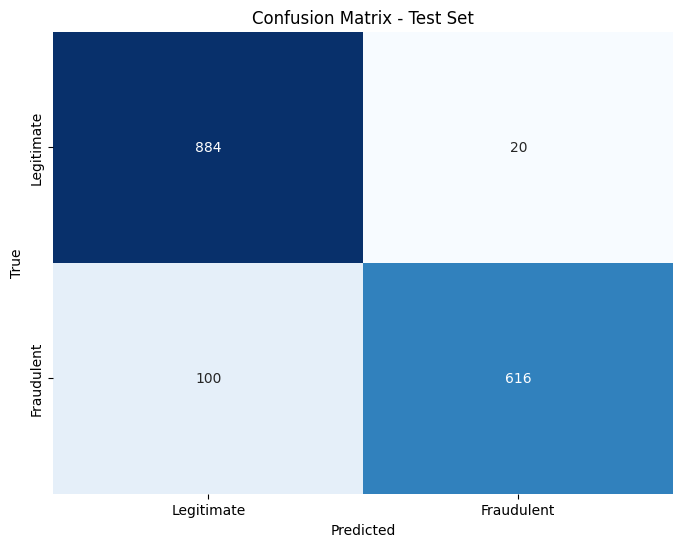

In [17]:
# Predict on the test set using the trained model
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


* True Positive (TP): 616 - The model correctly predicted 616 instances as fraudulent.
* True Negative (TN): 868 - The model correctly predicted 868 instances as legitimate.
* False Positive (FP): 36 - The model incorrectly predicted 36 instances as fraudulent when they were legitimate (Type I error).
* False Negative (FN): 100 - The model incorrectly predicted 100 instances as legitimate when they were fraudulent (Type II error).